# Teste de habilidades Looqbox

Candidato Wesley Brito <br>
 E-mail: wesleybritowx@gmail.com

#### Tables descriptions (you can click on them to see the columns on each table)


##### DATA_PRODUCT: PRODUCT INFO


| COLUMN NAME      | COLUMN DESCRIPTION                                           |
|------------------|-------------------------------------------------------------|
| PRODUCT_COD      | PRODUCT CODE                                                |
| PRODUCT_NAME     | PRODUCT FULL NAME                                          |
| PRODUCT_VAL      | PRODUCT SALES VALUE                                        |
| DEP_NAME         | NAME OF THE DEPARTMENT RESPONSIBLE FOR THE PRODUCT         |
| DEP_COD          | CODE OF THE DEPARTMENT RESPONSIBLE FOR THE PRODUCT         |
| SECTION_NAME     | NAME OF THE SECTION WHERE THE PRODUCT IS                   |
| SECTION_COD      | CODE OF THE SECTION WHERE THE PRODUCT IS                   |


##### DATA_PRODUCT_SALES: PRODUCT SALES

|COLUMN NAME	|COLUMN DESCRIPTION      |
|------------------|------------------------|
|STORE_CODE|	STORE CODE      |
|PRODUCT_CODE|	PRODUCT CODE        |
|DATE|	SALES DATE      |
|SALES_VALUE|	SALES VALUES        |
|SALES_QTY|	SALES QUANTITY      |

##### DATA_STORE_CAD: STORE INFO

|STORE_CODE|	STORE CODE|
|----|-------|
|STORE_NAME|	STORE NAME|
|START_DATE|	SHOP OPENING DATE|
|END_DATA|	SHOP CLOSING DATE|
|BUSINESS_NAME|	NAMES OF BUSINESS AREA RESPONSIBLE FOR THE SHOP|
|BUSINESS_CODE|	CODE OF BUSINESS AREA RESPONSIBLE FOR THE SHOP|

##### DATA_STORE_SALES: SALES PER STORE

|COLUMN| NAME	COLUMN DESCRIPTION|
|-|-|
|STORE_CODE|	STORE CODE|
|DATE|	COMMERCIAL DATE|
|SALES_VALUE|	TOTAL VALUE OF SALES IN THAT DATE|
|SALES_QTY|	TOTAL QUANTITY OF SALES IN THAT DATE|

#### SQL test


After accessing our database, create queries using the schema looqbox_challenge to answer the following questions:

1. What are the 10 most expensive products in the company?
2. What sections do the 'BEBIDAS' and 'PADARIA' departments have?
3. What was the total sale of products (in $) of each Business Area in the first quarter of 2019?

#### Cases

##### 1) The Dev Team was tired of developing the same old queries just varying the filters accordingly to their boss demands.


As a new member of the crew, your mission now is to create a dynamic function in Python, on the most flexible of ways, to produce queries and retrieve a dataframe based on three parameters:

- product_code: integer

- store_code: integer

- date: list of ISO-like strings

- Date e.g.
    - ['2019-01-01', '2019-01-31']

It should look like this my_data = retrieve_data(product_code, store_code, date)

Make your team proud!

Extra instructions:

- Retrieve all columns from table data_product_sales;
- Imagine people from other teams will also utilize this function!

##### 2) A brand new client sent you two ready-to-go queries. Those are listed below:

Query 1:
```sql
SELECT
      STORE_CODE,
      STORE_NAME,
      START_DATE,
      END_DATE,
      BUSINESS_NAME,
      BUSINESS_CODE
FROM data_store_cad;

Query 2:

SELECT
        STORE_CODE,
        DATE,
        SALES_VALUE,
        SALES_QTY
FROM data_store_sales
WHERE DATE BETWEEN '2019-01-01' AND '2019-12-31';

In addition, he gave you this set of instructions:

- Use the queries as they are (do not modify them or create a new one);

- Please filter the period between this given range:

    - `['2019-10-01','2019-12-31']`

##### We are in need of this visualization (click here to see it)! Please, create it with Python

|Loja|	Categoria|	TM|
|-|-|-|
|Bahia	|Atacado	|15.39|
|Bangkok	|Posto	|13.67|
|Belem	|Proximidade|	15.37|
|Berlin	|Proximidade|	15.39|
|Buenos Aires|	Atacado|	15.39|
|Chicago	|Varejo|	15.53|
|Dubai	|Atacado|	15.39|
|Hong Kong	|Farma|	26.35|
|London	|Farma	|28.99|
|Madri	|Farma	|29.03|
|Miami	|Posto	|13.67|
|New York	|Proximidade|	15.39|
|Paris	|Proximidade|	15.39|
|Rio de Janeiro	|Farma	|29.59|
|Roma	|Varejo	|15.39|
|Salvador	|Atacado|	15.39|
|Sao Paulo	|Varejo	|15.39|
|Sidney	|Posto	|13.67|
|Tokio	|Varejo	|15.39|
|Vancouver	|Posto	13.67|

##### 3) Building your own visualization

Create at least one chart using the table IMDB_movies. The code must be in Python, and you are free to use any libraries, data in the table and graphic format. Explain why you chose the visualization (or visualizations) you are submitting.

# Resolução

#### Import

In [2]:
!pip install mysql-connector-python

In [3]:
import mysql.connector
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

#### Funções

In [ ]:
def get_db_credentials():
    """
    Função que lê as credenciais do banco de dados a partir de um arquivo de texto.
    O arquivo deve conter as credenciais no formato:
    host: <host>
    user: <user>
    password: <password>
    database: <database>
    Retorna:
    Um dicionário com as credenciais ou None se o arquivo estiver inválido.
    """
    tokens = {}
    path = 'credenciais.txt'
    with open(path, 'r') as file:
        lines = file.readlines()
    for line in lines:
        line = line.split(':')
        tokens[line[0]] = line[1].strip()
    if list(tokens.keys())==['host','user','password','database']:

        return tokens
    else:
        print('Arquivo de credenciais inválido!')
        return None

def get_query(query, conn):
    """
    Função que executa uma consulta SQL no banco de dados e retorna os resultados.
    
    Parâmetros:
    query (str): A consulta SQL a ser executada.
    conn (MySQLConnection): A conexão com o banco de dados.
    
    Retorna:
    list: Uma lista de tuplas contendo os resultados da consulta.
    """
    cursor = conn.cursor()
    cursor.execute(query)
    results = cursor.fetchall()
    cursor.close()
    return results

#### Teste SQL ✅

In [188]:
tokens = get_db_credentials()
# Conexão com o banco de dados
conn = mysql.connector.connect(**tokens)

query = "SHOW TABLES;"

results = get_query(query, conn)
for result in results:
    print(result[0])
conn.close()

IMDB_movies
data_product
data_product_sales
data_store_cad
data_store_sales


In [ ]:

# Pegando os credenciais do banco
tokens = get_db_credentials()
# Conexão com o banco de dados
conn = mysql.connector.connect(**tokens)

query = """SELECT PRODUCT_NAME, PRODUCT_VAL 
FROM data_product
ORDER BY PRODUCT_VAL DESC
LIMIT 10;"""
results = get_query(query, conn)
# não esquecer de desconectar :)
conn.close()
# Organizando em um DataFrame
top10_price_product = pd.DataFrame(results, columns=['Name', 'Price'])
top10_price_product['Price'] = top10_price_product['Price'].apply(lambda x: f"$ {x:.2f}")
display(top10_price_product)

,Name,Price
0,Whisky Escoces THE MACALLAN Ruby Garrafa 700ml...,$ 741.99
1,Whisky Escoces JOHNNIE WALKER Blue Label Garra...,$ 735.90
2,Cafeteira Expresso 3 CORACOES Tres Modo Vermelho,$ 499.00
3,Vinho Portugues Tinto Vintage QUINTA DO CRASTO...,$ 445.90
4,Escova Dental Eletrica ORAL B D34 Professional...,$ 399.90
5,Champagne Rose VEUVE CLICQUOT PONSARDIM Garraf...,$ 366.90
6,Champagne Frances Brut Imperial MOET Rose Garr...,$ 359.90
7,Conjunto de Panelas Allegra em Inox TRAMONTINA...,$ 359.00
8,Whisky Escoces CHIVAS REGAL 18 Anos Garrafa 750ml,$ 329.90
9,Champagne Frances Brut Imperial MOET & CHANDON...,$ 315.90


In [148]:
tokens = get_db_credentials()
# Conexão com o banco de dados
conn = mysql.connector.connect(**tokens)

query = """SELECT DEP_NAME, SECTION_NAME 
            FROM data_product 
            WHERE DEP_NAME = 'BEBIDAS' OR DEP_NAME = 'PADARIA'
            GROUP BY DEP_NAME, SECTION_NAME
            ORDER BY DEP_NAME;"""
results = get_query(query, conn)
# não esquecer de desconectar :)
conn.close()
Departamentos = {'BEBIDAS':[],'PADARIA': []}
for result in results:
    if result[0] in Departamentos.keys():
        Departamentos[result[0]].append(result[1])

df={}
for i in Departamentos:
    df[i] = pd.DataFrame(Departamentos[i], columns=[i])
    display(df[i])

,BEBIDAS
0,BEBIDAS
1,CERVEJAS
2,REFRESCOS
3,VINHOS


,PADARIA
0,DOCES-E-SOBREMESAS
1,GESTANTE
2,PADARIA
3,QUEIJOS-E-FRIOS


In [ ]:
tokens = get_db_credentials()
# Conexão com o banco de dados
conn = mysql.connector.connect(**tokens)

query = """SELECT dsc.BUSINESS_NAME, SUM(dss.SALES_VALUE) AS total_sales_value, SUM(dss.SALES_QTY) AS total_sales_qty
FROM data_store_sales dss
JOIN data_store_cad dsc ON dss.STORE_CODE = dsc.STORE_CODE
WHERE dss.DATE BETWEEN '2019-01-01' AND '2019-03-31'
GROUP BY dsc.BUSINESS_NAME
ORDER BY SUM(dss.SALES_VALUE) DESC;
"""
results = get_query(query, conn)
# não esquecer de desconectar :)
conn.close()

# Organizando em um DataFrame
venda_q1 = pd.DataFrame(results, columns=['Área de Negócio', 'Total de vendas em $','Quantidade de vendas'])
venda_q1['Total de vendas em $'] = venda_q1['Total de vendas em $'].apply(lambda x: f"$ {x:,.2f}")
display(venda_q1)

,Área de Negócio,Total de vendas em $,Quantidade de vendas
0,Farma,"$ 81,776,691.73",2854179
1,Varejo,"$ 81,032,347.65",5252352
2,Atacado,"$ 80,384,884.60",5221672
3,Proximidade,"$ 80,171,122.80",5209730
4,Posto,"$ 32,072,326.40",2347032


#### Case 1 ✅

In [11]:
def retrieve_data(product_code: int, store_code: int, data: list):
    """
    Função que Recebe o codigo do produto, codigo da loja, uma lista com data inicio e fim
    respeito o tipo dos dados:
    product_code: inteiro
    store_code: inteiro
    data: ['AAAA-MM-DD','AAAA-MM-DD'] lista com 2 elementos string no formato AAAA-MM-DD

    antes da query completa conferimos se product_code e store_code existem de fato.
    retorna um dataframe.

    """
    # Verificando os tipos de dados
    if not isinstance(product_code, int):
        return "O 'product_code' deve ser um número inteiro."
    
    if not isinstance(store_code, int):
        return "O 'store_code' deve ser um número inteiro."
    
    # checando Data
    if not isinstance(data, list) or len(data) != 2:
        return "A lista com as data deve ter duas posições, inicio e fim AAAA-MM-DD"
    
    for date_str in data:
        try:
            # Tenta converter a string para um objeto datetime
            datetime.strptime(date_str, '%Y-%m-%d')
        except ValueError:
            return f"A data '{date_str}' não está no formato correto (AAAA-MM-DD)."
        
    #atribuindo datas inicio e fim
    data_inicio, data_fim = data

    # conexão com banco
    tokens = get_db_credentials()
    conn = mysql.connector.connect(**tokens)

    
    #conferindo validade do store_code
    query = f"""SELECT STORE_CODE,STORE_NAME 
                FROM data_store_cad;"""
    results = get_query(query, conn)

    STORE_CODE ={}
    for result in results:
        STORE_CODE[result[0]] = result[1]
        
    if not store_code in STORE_CODE.keys():
        print('Você escolheu uma loja fora do escopo')
        print(STORE_CODE)
        conn.close()
        return None
    
    #conferindo validade do product_code
    query = f"""SELECT PRODUCT_COD,PRODUCT_NAME 
                FROM data_product;"""
    results = get_query(query, conn)

    PRODUCT_COD ={}
    for result in results:
        PRODUCT_COD[result[0]] = result[1]

    if not product_code in PRODUCT_COD.keys():
        print('Você escolheu um produto fora do escopo')
        print(PRODUCT_COD)
        conn.close()
        return None

    # realizando a Query
    query = f"""SELECT STORE_CODE, PRODUCT_CODE, DATE, SALES_VALUE,SALES_QTY
                FROM data_product_sales
                WHERE STORE_CODE = {store_code} 
                AND PRODUCT_CODE = {product_code} 
                AND DATE BETWEEN '{data_inicio}' AND '{data_fim}'
                ORDER BY STORE_CODE ASC;"""
    results = get_query(query, conn)
    # não esquecer de desconectar :)
    conn.close()
    print('query envida: ')
    print(query)
    # Organizando em um DataFrame
    table = pd.DataFrame(results, columns=['STORE_CODE', 'PRODUCT_CODE', 'DATE', 'SALES_VALUE','SALES_QTY'])
    table['SALES_VALUE'] = table['SALES_VALUE'].apply(lambda x: float(f"{x:.2f}"))
    return table
# chamando a função 
product_code= 18
store_code = 1
data = ['2019-01-01', '2019-01-31']
dados = retrieve_data(product_code,store_code,data)
display(dados.head(5))

query envida: 
SELECT STORE_CODE, PRODUCT_CODE, DATE, SALES_VALUE,SALES_QTY
                FROM data_product_sales
                WHERE STORE_CODE = 1 
                AND PRODUCT_CODE = 18 
                AND DATE BETWEEN '2019-01-01' AND '2019-01-31'
                ORDER BY STORE_CODE ASC;


,STORE_CODE,PRODUCT_CODE,DATE,SALES_VALUE,SALES_QTY
0,1,18,2019-01-01,708.5,65
1,1,18,2019-01-02,1297.1,119
2,1,18,2019-01-03,1144.5,105
3,1,18,2019-01-04,1090.0,100
4,1,18,2019-01-05,893.8,82


#### Case 2 ✅

In [193]:
tokens = get_db_credentials()
# Conexão com o banco de dados
conn = mysql.connector.connect(**tokens)

query = """SELECT
      STORE_CODE,
      STORE_NAME,
      START_DATE,
      END_DATE,
      BUSINESS_NAME,
      BUSINESS_CODE
FROM data_store_cad;
"""
results = get_query(query, conn)
# não esquecer de desconectar :)
conn.close()

# Organizando em um DataFrame
query1 = pd.DataFrame(results, columns=['STORE_CODE','STORE_NAME','START_DATE','END_DATE','BUSINESS_NAME','BUSINESS_CODE'])

display(query1.head(2))

,STORE_CODE,STORE_NAME,START_DATE,END_DATE,BUSINESS_NAME,BUSINESS_CODE
0,1,Sao Paulo,2006-10-01,,Varejo,1
1,2,Chicago,2007-10-01,,Varejo,1


In [ ]:
tokens = get_db_credentials()
# Conexão com o banco de dados
conn = mysql.connector.connect(**tokens)

query = """SELECT
        STORE_CODE,
        DATE,
        SALES_VALUE,
        SALES_QTY
FROM data_store_sales
WHERE DATE BETWEEN '2019-01-01' AND '2019-12-31';
"""
results = get_query(query, conn)
# não esquecer de desconectar :)
conn.close()

# Organizando em um DataFrame
query2 = pd.DataFrame(results, columns=['STORE_CODE','DATE','SALES_VALUE','SALES_QTY'])

,STORE_CODE,DATE,SALES_VALUE,SALES_QTY
0,1,2019-01-01,196623.22,12838
1,10,2019-01-01,126795.44,4933


In [ ]:
merge_df = pd.merge(query2,query1,how='left',on='STORE_CODE' )

grouped = merge_df.groupby('STORE_NAME').agg(
    Categoria=('BUSINESS_NAME', lambda x: x.mode()[0]),
    total_sales=('SALES_VALUE', 'sum'),
    total_sales_qty=('SALES_QTY', 'sum')
).reset_index()

grouped['TM'] = grouped['total_sales'] / grouped['total_sales_qty']
resumo = grouped[['STORE_NAME','Categoria','TM']]
resumo.loc[:, 'TM']  = resumo.loc[:, 'TM'].apply(lambda x: float(f'{x:.2f}'))
resumo = resumo.rename(columns={'STORE_NAME':'Loja'})

resumo

,Loja,Categoria,TM
0,Bahia,Atacado,15.39
1,Bangkok,Posto,13.67
2,Belem,Proximidade,15.37
3,Berlin,Proximidade,15.39
4,Buenos Aires,Atacado,15.39
5,Chicago,Varejo,15.53
6,Dubai,Atacado,15.39
7,Hong Kong,Farma,26.33
8,London,Farma,28.96
9,Madri,Farma,29.00


#### Case 3 ✅

In [4]:
tokens = get_db_credentials()
# Conexão com o banco de dados
conn = mysql.connector.connect(**tokens)

query = """SHOW COLUMNS FROM IMDB_movies;"""
results = get_query(query, conn)
# não esquecer de desconectar :)
conn.close()
columns = []
for result in results:
    columns.append(result[0])
columns

['Id',
 'Title',
 'Genre',
 'Director',
 'Actors',
 'Year',
 'Runtime',
 'Rating',
 'Votes',
 'RevenueMillions',
 'Metascore']

In [5]:
tokens = get_db_credentials()
# Conexão com o banco de dados
conn = mysql.connector.connect(**tokens)

query = """SELECT Id, Title, Genre, Director, Actors, Year, Runtime, Rating, Votes, RevenueMillions, Metascore 
            FROM IMDB_movies;"""
results = get_query(query, conn)
# não esquecer de desconectar :)
conn.close()

movies =  pd.DataFrame(results, columns=columns)
movies

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8,757074,333,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7,485820,126,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7,157606,138,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7,60545,270,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6,393727,325,40.0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6,27585,None,45.0
996,997,Hostel: Part II,Horror,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,6,73152,18,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6,70699,58,50.0
998,999,Search Party,"Adventure,Comedy",Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,6,4881,None,22.0


In [97]:
movies = pd.read_excel('Movies.xlsx')

In [ ]:
genero = {}

for index, row in movies.iterrows():
    lista = row['Genre']
    for i in lista.split(','):
        genero[i] = True

movies[list(genero.keys())] = 0

for index, row in movies.iterrows():
    lista = row['Genre']
    for i in lista.split(','):
        movies.at[index, i] = 1

movies.drop(columns=['Genre','Id','Actors'], inplace = True)
movies

,Title,Director,Year,Runtime,Rating,Votes,RevenueMillions,Metascore,Action,Adventure,...,Drama,Music,Biography,Romance,History,Crime,Western,War,Musical,Sport
0,Guardians of the Galaxy,James Gunn,2014,121,8,757074,333.0,76.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Prometheus,Ridley Scott,2012,124,7,485820,126.0,65.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Split,M. Night Shyamalan,2016,117,7,157606,138.0,62.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sing,Christophe Lourdelet,2016,108,7,60545,270.0,59.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Suicide Squad,David Ayer,2016,123,6,393727,325.0,40.0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Secret in Their Eyes,Billy Ray,2015,111,6,27585,NaN,45.0,0,0,...,1,0,0,0,0,1,0,0,0,0
996,Hostel: Part II,Eli Roth,2007,94,6,73152,18.0,46.0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,Step Up 2: The Streets,Jon M. Chu,2008,98,6,70699,58.0,50.0,0,0,...,1,1,0,1,0,0,0,0,0,0
998,Search Party,Scot Armstrong,2014,93,6,4881,NaN,22.0,0,1,...,0,0,0,0,0,0,0,0,0,0


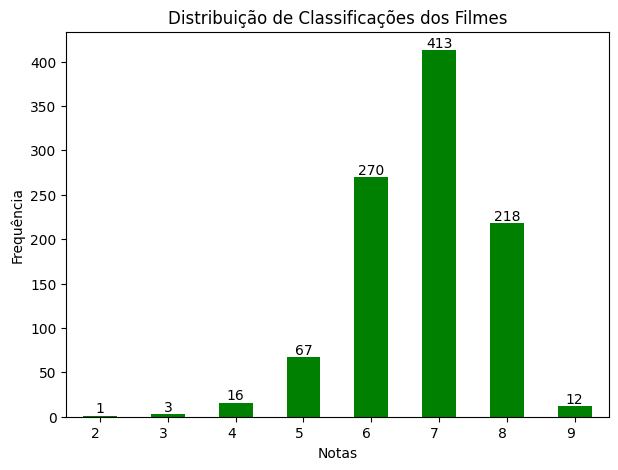

In [ ]:
#  QUATIDADE DE FILMES POR CLASSIFICAÇÃO
evalutions = movies['Rating'].value_counts().sort_index()
# Histograma
plt.figure(figsize=(7,5))

bars =  evalutions.plot(kind='bar', color='green')
# Adicionando rótulos
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posição X 
             bar.get_height(),  # Posição Y 
             int(bar.get_height()),  # rótulo
             ha='center', va='bottom', fontsize=10, color='black')  # Config
plt.title('Distribuição de Classificações dos Filmes')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.xticks(rotation=0, ha='right')
plt.show()

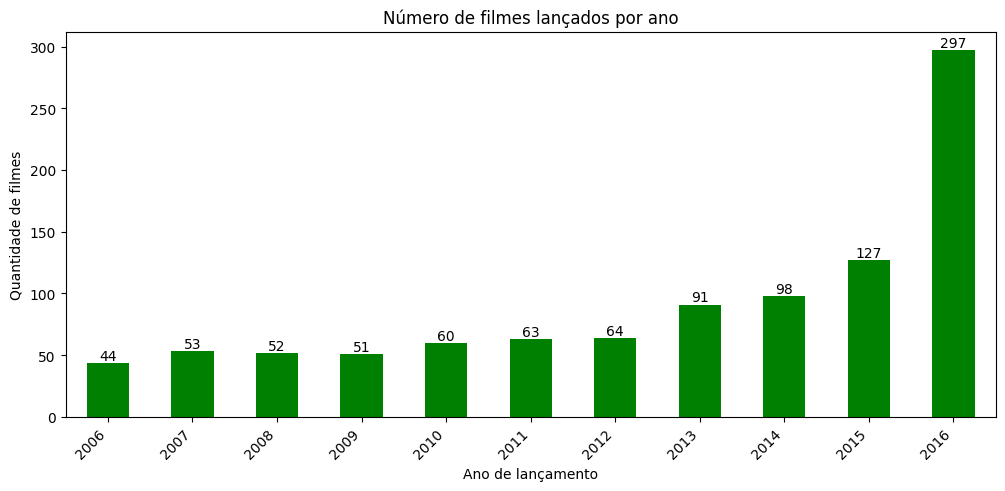

In [80]:
# Contagem de filmes por ano
year_counts = movies['Year'].value_counts().sort_index()
# Criando o gráfico de barras
plt.figure(figsize=(12, 5))
bars = year_counts.plot(kind='bar', color='green')
# Adicionando rótulos 
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posição X 
             bar.get_height(),  # Posição Y
             int(bar.get_height()),  # Rótulo 
             ha='center', va='bottom', fontsize=10, color='black')  # Config

# Configurações extras do gráfico
plt.title('Número de filmes lançados por ano')
plt.xlabel('Ano de lançamento')
plt.ylabel('Quantidade de filmes')
plt.xticks(rotation=45, ha='right')
plt.show()

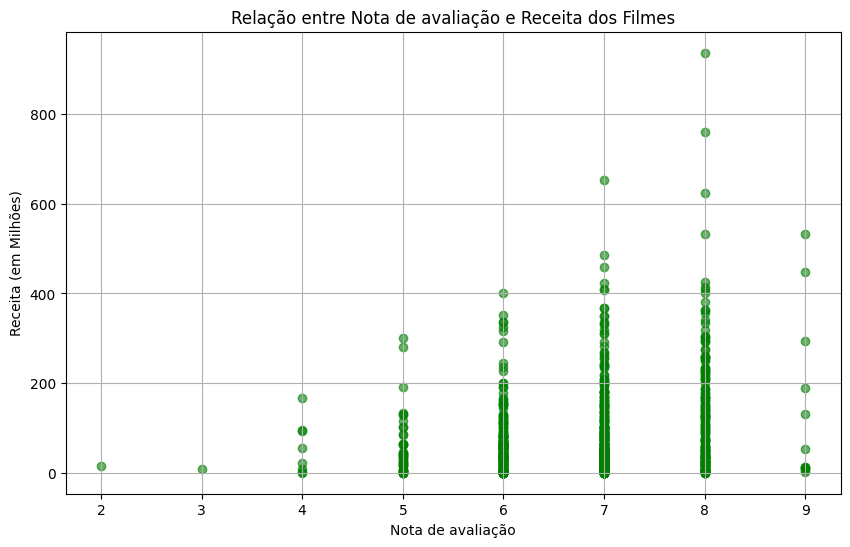

In [81]:
# Relação entre Nota de avaliação e Receita dos Filmes
plt.figure(figsize=(10, 6))
plt.scatter(movies['Rating'], movies['RevenueMillions'], alpha=0.6, color='green')
plt.title('Relação entre Nota de avaliação e Receita dos Filmes')
plt.xlabel('Nota de avaliação')
plt.ylabel('Receita (em Milhões)')
plt.grid(True)
plt.show()


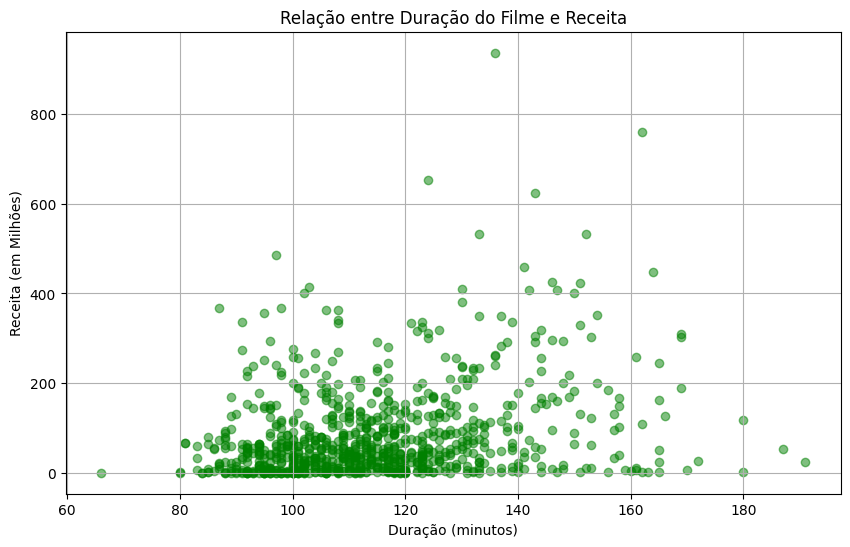

In [74]:
# Gráfico de dispersão entre Duração e Receita
plt.figure(figsize=(10, 6))
plt.scatter(movies['Runtime'], movies['RevenueMillions'], alpha=0.5, color='Green')
plt.title('Relação entre Duração do Filme e Receita')
plt.xlabel('Duração (minutos)')
plt.ylabel('Receita (em Milhões)')
plt.grid(True)
plt.show()


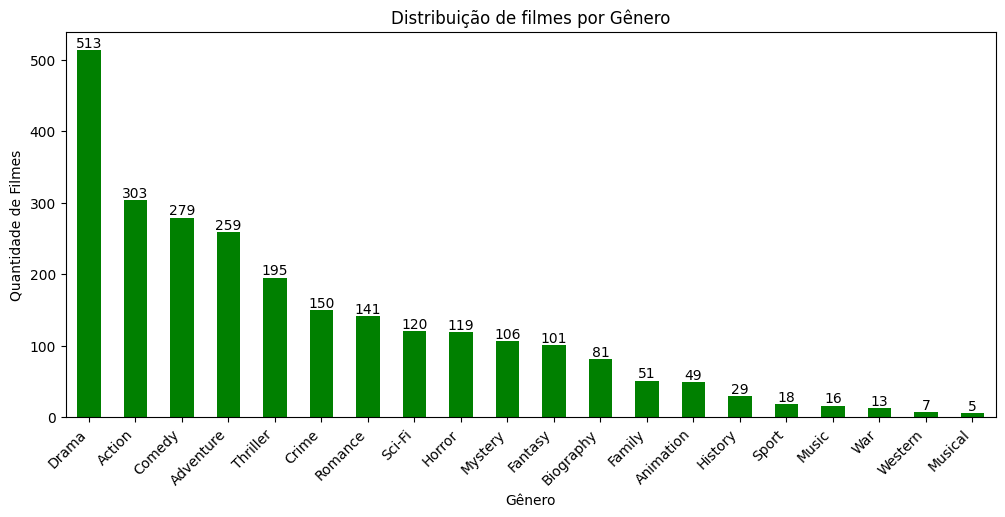

In [ ]:
# Somando os valores de cada coluna de gênero
genero_count = movies[list(genero.keys())].sum().sort_values(ascending=False)
# gráfico de barras
plt.figure(figsize=(12, 5))
bars = genero_count.plot(kind='bar', color='Green')
# Adicionando rótulos acima das barras
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posição X 
             bar.get_height(),  # Posição Y 
             int(f'{bar.get_height()}'),  # Rótulo
             ha='center', va='bottom', fontsize=10, color='black')  # Config
plt.title('Distribuição de filmes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45, ha='right')
plt.show()


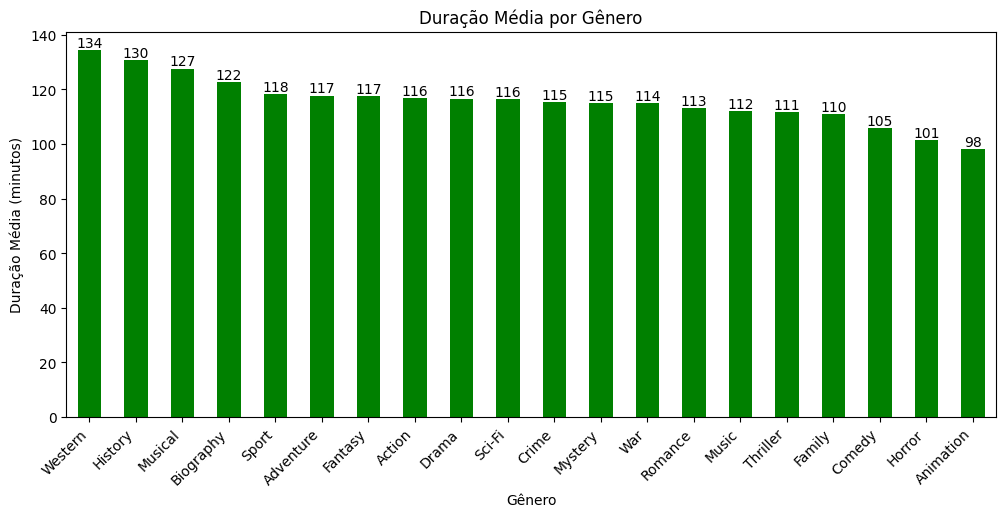

In [ ]:
tempo_por_genero = {}
# Para cada gênero, calcular a média de duração
for genre in list(genero.keys()):
    # Filtrando filmes que pertencem a esse gênero
    genre_movies = movies[movies[genre] == 1]
    
    tempo_por_genero[genre] = genre_movies['Runtime'].mean()
tempo_por_genero_df = pd.DataFrame(list(tempo_por_genero.items()), columns=['Genre', 'duração média'])
tempo_por_genero_df = tempo_por_genero_df.sort_values(by='duração média', ascending=False)
plt.figure(figsize=(12, 5))
bars  = tempo_por_genero_df.set_index('Genre')['duração média'].plot(kind='bar', color='green')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posição X
             bar.get_height(),  # Posição Y
             int(bar.get_height()),  # Rótulo
             ha='center', va='bottom', fontsize=10, color='black')  # Config
plt.title('Duração Média por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Duração Média (minutos)')
plt.xticks(rotation=45, ha='right')
plt.show()